In [1]:
import numpy as np
import requests
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style("whitegrid")
# plt.style.use("seaborn")

block_plot = False

# Text formatting.
bold = "\033[1m"
end = "\033[0m"

In [2]:
all_modules = dir(tf.keras.applications)

# Navigate the tf.keras.applications namespace and display the available models.
for module in all_modules:
    if module[0].islower():
        if module != 'imagenet_utils':
            # Ignore imagenet_utils.
            print(f"Model Family: {bold}{module}{end}")
        if module == "mobilenet_v3":
            # Handel special case for mobilenet_v3.
            temp = "MobileNetV3Large"
            print(f"\t  |__ {temp}")
            temp = "MobileNetV3LSmall"
            print(f"\t  |__ {temp}")
        else:
            # General case.
            models = dir(getattr(tf.keras.applications, module))
            for model in models:
                if model[0].isupper():
                    print(f"\t  |__ {model}")
        print()

Model Family: convnext
	  |__ ConvNeXtBase
	  |__ ConvNeXtLarge
	  |__ ConvNeXtSmall
	  |__ ConvNeXtTiny
	  |__ ConvNeXtXLarge

Model Family: densenet
	  |__ DenseNet121
	  |__ DenseNet169
	  |__ DenseNet201

Model Family: efficientnet
	  |__ EfficientNetB0
	  |__ EfficientNetB1
	  |__ EfficientNetB2
	  |__ EfficientNetB3
	  |__ EfficientNetB4
	  |__ EfficientNetB5
	  |__ EfficientNetB6
	  |__ EfficientNetB7

Model Family: efficientnet_v2
	  |__ EfficientNetV2B0
	  |__ EfficientNetV2B1
	  |__ EfficientNetV2B2
	  |__ EfficientNetV2B3
	  |__ EfficientNetV2L
	  |__ EfficientNetV2M
	  |__ EfficientNetV2S


Model Family: inception_resnet_v2
	  |__ InceptionResNetV2

Model Family: inception_v3
	  |__ InceptionV3

Model Family: mobilenet
	  |__ MobileNet

Model Family: mobilenet_v2
	  |__ MobileNetV2

Model Family: mobilenet_v3
	  |__ MobileNetV3Large
	  |__ MobileNetV3LSmall

Model Family: nasnet
	  |__ NASNetLarge
	  |__ NASNetMobile

Model Family: resnet
	  |__ ResNet101
	  |__ ResNet152
	

In [3]:
# Load and Display Test Image
IMG_PATH = "test.jpg"

# Download a sample test image.
!wget https://learnopencv.com/wp-content/uploads/2021/10/panda_test_image.jpg -O 'test.jpg'

--2025-11-30 01:35:49--  https://learnopencv.com/wp-content/uploads/2021/10/panda_test_image.jpg
Resolving learnopencv.com (learnopencv.com)... 141.193.213.11, 141.193.213.10
Connecting to learnopencv.com (learnopencv.com)|141.193.213.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84759 (83K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  82.77K  --.-KB/s    in 0.001s  

2025-11-30 01:35:49 (56.0 MB/s) - ‘test.jpg’ saved [84759/84759]



test.jpg


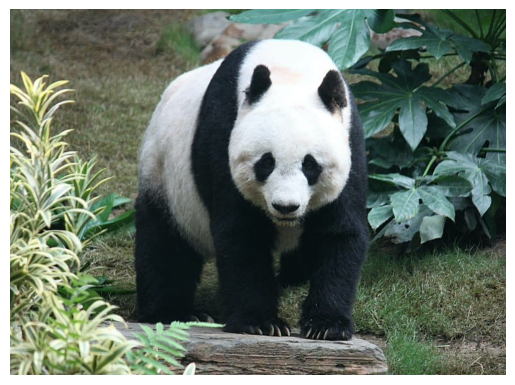

In [4]:
# Read and display the sample image.
print(IMG_PATH)
image = plt.imread(IMG_PATH)

plt.imshow(image)
plt.axis("off")
plt.show(block=block_plot)

In [5]:
# Specify the input image size based on the selected model.
IMG_SHAPE = (224, 224, 3)

# model_family = "densenet"
# model_name = "DenseNet121"           # (224, 224, 3)
# model_name = "DenseNet169"           # (224, 224, 3)
# model_name = "DenseNet201"           # (224, 224, 3)

# model_family = "EfficientNet"
# model_name   = "EfficientNetB0"      # (224, 224, 3)
# model_name   = "EfficientNetB1"      # (240, 240, 3)
# model_name   = "EfficientNetB2"      # (260, 260, 3)
# model_name   = "EfficientNetB3"      # (300, 300, 3)
# model_name   = "EfficientNetB4"      # (380, 380, 3)
# model_name   = "EfficientNetB5"      # (456, 456, 3)
# model_name   = "EfficientNetB6"      # (528, 528, 3)
# model_name   = "EfficientNetB7"      # (600, 600, 3)

# model_family = "inception_resnet_v2"
# model_name   = "InceptionResNetV2"   # (299, 299, 3)

# model_family = "inception_v3"
# model_name   = "InceptionV3"         # (299, 299, 3)

# model_family = "mobilenet"
# model_name   = "MobileNet"           # (224, 224, 3)

# model_family = "mobilenet_v2"
# model_name   = "MobileNetV2"         # (224, 224, 3)

# model_family = "mobilenet_v3"
# model_name   = "MobileNetV3"         # (224, 224, 3)

model_family = "mobilenet_v3"
model_name   = "MobileNetV3Small"      # (224, 224, 3)
# model_name   = "MobileNetV3Large"    # (224, 224, 3)

# model_family = "nasnet"
# model_name   = "NASNetMobile"        # (224, 224, 3)

# model_family = "resnet"
# model_name   = "ResNet101"           # (224, 224, 3)
# model_name   = "ResNet152"           # (224, 224, 3)
# model_name   = "ResNet50"            # (224, 224, 3)

# model_family = "resnet50"
# model_name   = "ResNet50"            # (224, 224, 3)

# model_family = "resnet_v2"
# model_name   = "ResNet101V2"         # (224, 224, 3)
# model_name   = "ResNet152V2"         # (224, 224, 3)
# model_name   = "ResNet50V2"          # (224, 224, 3)

# model_family = "vgg16"
# model_name   = "VGG16"               # (224, 224, 3)

# model_family = "vgg19"
# model_name   = "VGG19"               # (224, 224, 3)

# model_family = "xception"
# model_name   = "Xception"            # (299, 299, 3)

In [6]:
def load_image(image_path, img_shape):

    # Load the image.
    image = tf.io.read_file(IMG_PATH)

    # Convert the image from bytes to an image tensor.
    x = tf.image.decode_image(image, channels=img_shape[2])

    # Resize image to the input shape required by the model.
    x = tf.image.resize(x, (img_shape[0], img_shape[1]))

    # Add a dimension for an image batch representation.
    x = tf.expand_dims(x, axis=0)

    return x

In [7]:
# Load the image and re-shape the image tensor.
input = load_image(image_path=IMG_PATH, img_shape=IMG_SHAPE)
print("Shape: ", input.shape)
print("Data type: ", input.dtype)
print("Min pixel value: ", tf.math.reduce_min(input).numpy())
print("Max pixel value: ", tf.math.reduce_max(input).numpy())

Shape:  (1, 224, 224, 3)
Data type:  <dtype: 'float32'>
Min pixel value:  0.0
Max pixel value:  255.0


In [8]:
# This is a convenience function that loads any model available in the `tf.keras.applications`.
def load_model(input_shape, model_name):

    # Models will be loaded wth pre-trainied `imagenet` weights.
    model = getattr(tf.keras.applications, model_name)(input_shape=input_shape, weights="imagenet")

    return model

In [9]:
def generate_predictions(input, model_family, model, top_k=3):

    # Initialize pre and post processing functions for the chosen model_family.
    preprocess  = getattr(tf.keras.applications, model_family).preprocess_input
    postprocess = getattr(tf.keras.applications, model_family).decode_predictions

    # Pre-process the input image.
    x = preprocess(input)

    # Generate predictions.
    preds = model.predict(x)

    # Print top_k predictions.
    post_preds = postprocess(preds, top=top_k)[0]

    print('Predicted')

    for i in post_preds:
        print(f"Class Description: {bold}{i[1]:<30}{end} Score: {bold}{i[2]}{end}")

    return preds

In [10]:
# Load an image.
input = load_image(image_path=IMG_PATH, img_shape=IMG_SHAPE)

# Load the model.
pretrained_model = load_model(input_shape=IMG_SHAPE, model_name=model_name)

# Generate predictions.
predictions = generate_predictions(input=input,
                                       model_family=model_family,
                                       model=pretrained_model,
                                       top_k=5,
                                      )

10734624/10734624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted
Class Description: giant_panda                    Score: 0.8280060291290283
Class Description: badger                         Score: 0.052398037165403366
Class Description: sloth_bear                     Score: 0.003428109921514988
Class Description: colobus                        Score: 0.0026460420340299606
Class Description: American_Staffordshire_terrier Score: 0.0024732425808906555
